# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [20]:
learning_rate = 0.01
training_steps = 1000

In [21]:
X = np.random.randn(50)
Y = 2 * X + np.random.randn(50)

In [22]:
W = tf.Variable(np.random.randn(), name = 'weight')
b = tf.Variable(np.random.randn(), name = 'bias')

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [23]:
def run_optimization():
    with tf.GradientTape() as tape:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    gradients = tape.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [24]:
for step in range(1, training_steps + 1):
    run_optimization()

    if step % 50 == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: {:4d}\tloss: {:.4f}\tW: {:.4f}\tb: {:.4f}".format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 1.1968	W: 1.5410	b: -0.1777
step:  100	loss: 0.8849	W: 1.7385	b: 0.1450
step:  150	loss: 0.8496	W: 1.7899	b: 0.2620
step:  200	loss: 0.8453	W: 1.8031	b: 0.3044
step:  250	loss: 0.8448	W: 1.8065	b: 0.3198
step:  300	loss: 0.8447	W: 1.8073	b: 0.3254
step:  350	loss: 0.8447	W: 1.8075	b: 0.3275
step:  400	loss: 0.8447	W: 1.8076	b: 0.3282
step:  450	loss: 0.8447	W: 1.8076	b: 0.3285
step:  500	loss: 0.8447	W: 1.8076	b: 0.3286
step:  550	loss: 0.8447	W: 1.8076	b: 0.3286
step:  600	loss: 0.8447	W: 1.8076	b: 0.3286
step:  650	loss: 0.8447	W: 1.8076	b: 0.3286
step:  700	loss: 0.8447	W: 1.8076	b: 0.3286
step:  750	loss: 0.8447	W: 1.8076	b: 0.3286
step:  800	loss: 0.8447	W: 1.8076	b: 0.3286
step:  850	loss: 0.8447	W: 1.8076	b: 0.3286
step:  900	loss: 0.8447	W: 1.8076	b: 0.3286
step:  950	loss: 0.8447	W: 1.8076	b: 0.3286
step: 1000	loss: 0.8447	W: 1.8076	b: 0.3286


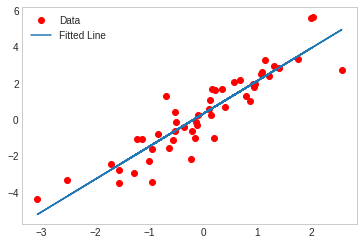

In [25]:
plt.plot(X, Y, 'ro', label = 'Data')
plt.plot(X, np.array(W * X + b), label = 'Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [26]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [27]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [28]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [29]:
print(a) # 그냥 출력하면 객체정보로 나옴
print(a.numpy())
print(b.numpy())
print(c.numpy())

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.56319785>
0.56319785
0.16734298
0.7693463


### 데이터 지정

In [30]:
X = np.random.randn(50)
Y = X ** 2 + X * np.random.randn(50)

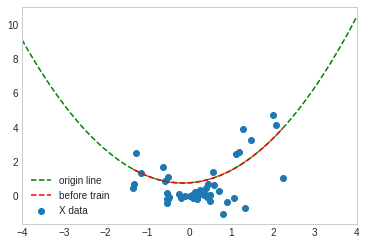

In [31]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a * line_x ** 2 + b * line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a * x_**2 + b * x_ + c

plt.scatter(X, Y, label = 'X data')
plt.plot(x_, y_, 'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--', label = 'before train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid()
plt.show()

### Util Functions

In [32]:
def compute_loss():
    pred_y = a * (np.array(X) ** 2) + b * np.array(X) + c
    loss = tf.reduce_mean((Y - pred_y) ** 2)
    return loss

### Optimizer

In [33]:
optimizer = Adam(learning_rate = learning_rate)

### 학습

In [38]:
for epoch in range(1, epochs + 1, 1):
    optimizer.minimize(compute_loss, var_list = [a, b, c])

    if epoch % 100 == 0:
        print("epoch : {:4d}\ta : {:.4f}\tb: {:.4f}\tc: {:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))


epoch :  100	a : 0.7249	b: 0.0664	c: 0.1101
epoch :  200	a : 0.7249	b: 0.0664	c: 0.1101
epoch :  300	a : 0.7249	b: 0.0664	c: 0.1101
epoch :  400	a : 0.7249	b: 0.0664	c: 0.1101
epoch :  500	a : 0.7249	b: 0.0664	c: 0.1101
epoch :  600	a : 0.7249	b: 0.0664	c: 0.1101
epoch :  700	a : 0.7249	b: 0.0664	c: 0.1101
epoch :  800	a : 0.7249	b: 0.0664	c: 0.1101
epoch :  900	a : 0.7249	b: 0.0664	c: 0.1101
epoch : 1000	a : 0.7249	b: 0.0664	c: 0.1101


### 학습 후의 회귀선

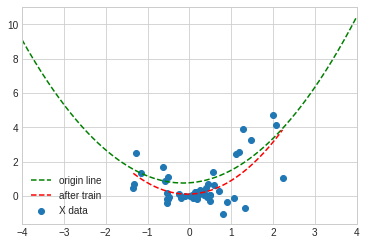

In [41]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a * line_x ** 2 + b * line_x + c


plt.scatter(X, Y, label = 'X data')
plt.plot(x_, y_, 'g--', label = 'origin line')
plt.plot(line_x, line_y, 'r--', label = 'after train')
plt.xlim(-4.0, 4.0)
plt.legend()
plt.grid(True)
plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [44]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [45]:
num_classes = 10
num_features = 28 * 28

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

### tf.data API 사용
- 03 에서 다시 다룸 

In [48]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

### 변수 지정

In [49]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name = 'weight')
b = tf.Variable(tf.zeros([num_classes]), name = 'bias')

### Util Functions

In [50]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
    true_y = tf.one_hot(true_y, depth = num_classes)
    pred_y = tf.clip_by_value(pred_y, 1e-9, 1.) # 값이 출력되는 범위 최대최소 지정
    
    return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # 평균예측값 리턴


### Optimizer

In [51]:
optimizer = tf.optimizers.SGD(learning_rate)

In [52]:
def run_optimization(x, y):
    with tf.GradientTape() as tape:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    gradients = tape.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

### 학습 진행

In [53]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):

    run_optimization(batch_x, batch_y)

    if step % 50 == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: {:4d}\tloss: {:.4f}\taccuracy: {:.4f}".format(step, loss, acc))

step:   50	loss: 8.6120	accuracy: 0.2266
step:  100	loss: 5.0729	accuracy: 0.3789
step:  150	loss: 3.8395	accuracy: 0.4648
step:  200	loss: 2.6613	accuracy: 0.5586
step:  250	loss: 2.1912	accuracy: 0.6367
step:  300	loss: 1.9480	accuracy: 0.6367
step:  350	loss: 2.0035	accuracy: 0.6328
step:  400	loss: 1.8265	accuracy: 0.6797
step:  450	loss: 1.1464	accuracy: 0.7031
step:  500	loss: 1.1813	accuracy: 0.7500
step:  550	loss: 1.1918	accuracy: 0.7188
step:  600	loss: 1.2913	accuracy: 0.7383
step:  650	loss: 1.2584	accuracy: 0.7305
step:  700	loss: 0.8714	accuracy: 0.8047
step:  750	loss: 0.9017	accuracy: 0.8047
step:  800	loss: 1.1893	accuracy: 0.7773
step:  850	loss: 0.8777	accuracy: 0.7969
step:  900	loss: 0.9559	accuracy: 0.7891
step:  950	loss: 0.9131	accuracy: 0.8125
step: 1000	loss: 0.7196	accuracy: 0.8164


###  테스트

In [54]:
pred = logistic_regression(x_test)
print("Test Accuracy: {}".format(accuracy(pred, y_test)))

Test Accuracy: 0.8004999756813049


### 시각화

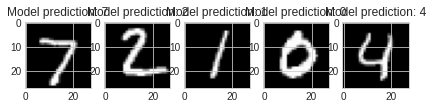

In [58]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize = (14, 8))
for i in range(1, num_images + 1, 1):
    plt.subplot(1, num_classes, i)
    plt.imshow(np.reshape(test_images[i - 1], [28, 28]), cmap = 'gray')
    plt.title("Model prediction: {}".format(np.argmax(predictions.numpy()[i - 1])))

plt.show()